In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std

In [2]:
# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
    
    # generate dataset
    X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]

    # scale inputs
    if input_scaler is not None:
        # fit scaler
        input_scaler.fit(trainX)
        # transform training dataset
        trainX = input_scaler.transform(trainX)
        # transform test dataset
        testX = input_scaler.transform(testX)

    if output_scaler is not None:
        # reshape 1d arrays to 2d arrays
        trainy = trainy.reshape(len(trainy), 1)
        testy = testy.reshape(len(trainy), 1)
        # fit scaler on training dataset
        output_scaler.fit(trainy)
        # transform training dataset
        trainy = output_scaler.transform(trainy)
        # transform test dataset
        testy = output_scaler.transform(testy)
    return trainX, trainy, testX, testy

In [3]:
# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
    
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))

    # compile model
    model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)

    # evaluate the model
    test_mse = model.evaluate(testX, testy, verbose=0)
    return test_mse

In [4]:
# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
    
    # get dataset
    trainX, trainy, testX, testy = get_dataset(input_scaler, output_scaler)
    # repeated evaluation of model 
    results = list()
    for _ in range(n_repeats):
        test_mse = evaluate_model(trainX, trainy, testX, testy)
        print('>%.3f' % test_mse)
        results.append(test_mse)
    return results    

In [5]:
# unscaled inputs
results_unscaled_inputs = repeated_evaluation(None, StandardScaler())
# normalized inputs
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())
# standardized inputs
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())

>0.008
>0.008
>0.010
>0.003
>0.013
>0.003
>0.012
>0.000
>0.001
>0.010
>0.008
>0.004
>0.009
>0.009
>0.012
>0.008
>0.007
>0.006
>0.010
>0.009
>0.003
>0.011
>0.009
>0.001
>0.001
>0.006
>0.012
>0.008
>0.003
>0.006
>0.001
>0.000
>0.001
>0.000
>0.000
>0.001
>0.001
>0.001
>0.001
>0.001
>0.001
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.001
>0.001
>0.001
>0.000
>0.001
>0.001
>0.000
>0.001
>0.000
>0.003
>0.012
>0.005
>0.002
>0.011
>0.004
>0.000
>0.001
>0.013
>0.005
>0.006
>0.005
>0.010
>0.008
>0.008
>0.006
>0.016
>0.005
>0.002
>0.000
>0.002
>0.006
>0.014
>0.007
>0.010
>0.008
>0.010
>0.009
>0.009
>0.003


In [6]:
# summarize results
print('Unscaled: %.3f (%.3f)' % (mean(results_unscaled_inputs),std(results_unscaled_inputs)))
print('Normalized: %.3f (%.3f)' % (mean(results_normalized_inputs),std(results_normalized_inputs)))
print('Standardized: %.3f (%.3f)' % (mean(results_standardized_inputs),std(results_standardized_inputs)))

Unscaled: 0.007 (0.004)
Normalized: 0.000 (0.000)
Standardized: 0.007 (0.004)


In [ ]:
'''Unexpectedly, better performance is seen using normalized
inputs instead of standardized inputs. This may be related to the choice of the rectified linear
activation function in the first hidden layer.'''

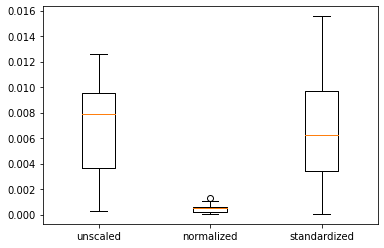

In [7]:
# plot results
results = [results_unscaled_inputs, results_normalized_inputs, results_standardized_inputs]
labels = ['unscaled', 'normalized', 'standardized']
pyplot.boxplot(results, labels=labels)
pyplot.show()

In [ ]:
'''A figure with three box and whisker plots is created summarizing the spread of error scores
for each configuration. The plots show that there was little difference between the distributions
of error scores for the unscaled and standardized input variables, and that the normalized input
variables result in better performance and more stable or a tighter distribution of error scores.'''

In [ ]:
'''These results highlight that it is important to actually experiment and confirm the results of
data scaling methods rather than assuming that a given data preparation scheme will work best
based on the observed distribution of the data.'''